In [1]:
# -*- coding:utf-8 -*-
# Author:凌逆战 | Never
# Date: 2023/8/12
"""
画出scipy.signal.butter函数的滤波器响应曲线
"""
import numpy as np
from scipy.signal import butter, freqz
import matplotlib.pyplot as plt

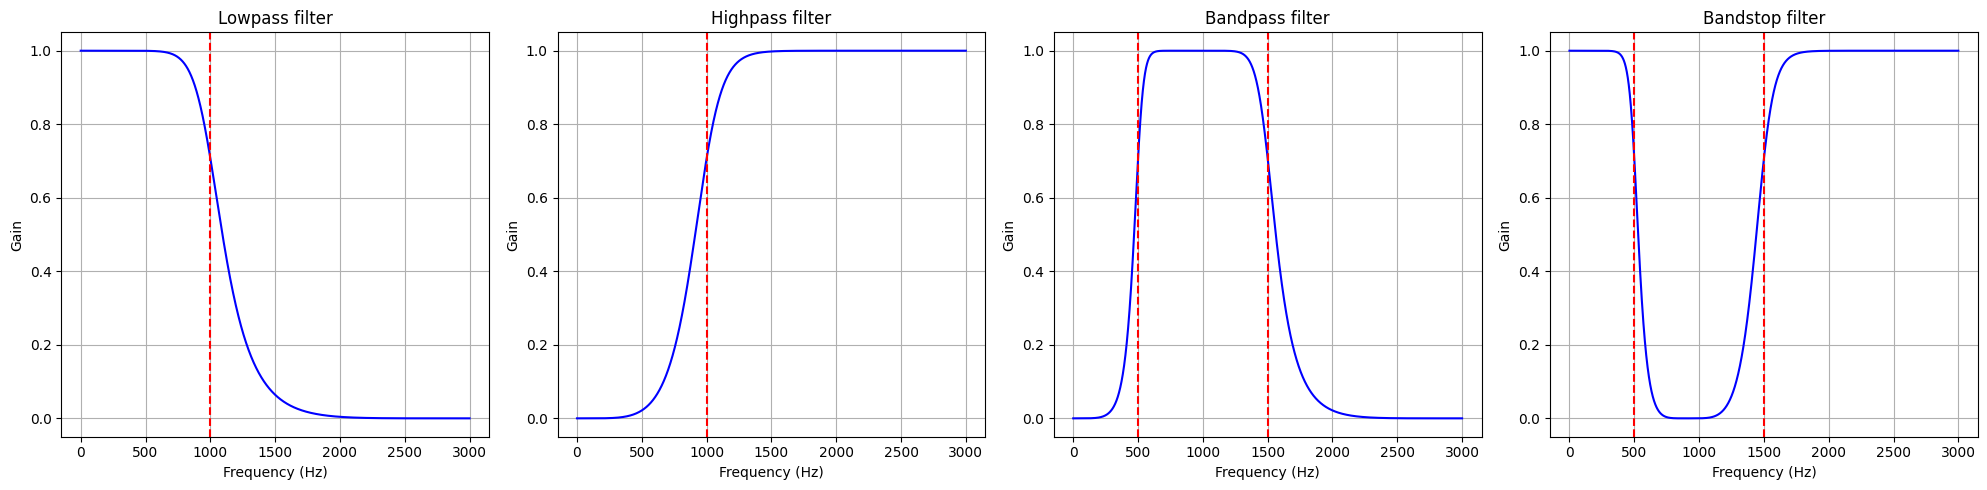

In [2]:
def plot_filter_response(b, a, title, subplot, cutoff=None, lowcut=None, highcut=None):
    w, h = freqz(b, a, worN=8000)
    subplot.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
    if cutoff:
        subplot.axvline(cutoff, color='r', ls='--')
    if lowcut:
        subplot.axvline(lowcut, color='r', ls='--')
    if highcut:
        subplot.axvline(highcut, color='r', ls='--')
    subplot.set_title(title)
    subplot.set_xlabel('Frequency (Hz)')
    subplot.set_ylabel('Gain')
    subplot.grid(True)

fs = 6000.0  # Sample rate (Hz)
cutoff = 1000.0  # Desired cutoff frequency (Hz)

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Lowpass filter
b, a = butter(5, cutoff / (0.5 * fs), btype='low')
plot_filter_response(b, a, 'Lowpass filter', axs[0], cutoff=cutoff)

# Highpass filter
b, a = butter(5, cutoff / (0.5 * fs), btype='high')
plot_filter_response(b, a, 'Highpass filter', axs[1], cutoff=cutoff)

# Bandpass filter
lowcut = 500.0
highcut = 1500.0
b, a = butter(5, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')
plot_filter_response(b, a, 'Bandpass filter', axs[2], lowcut=lowcut, highcut=highcut)

# Bandstop filter
b, a = butter(5, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='bandstop')
plot_filter_response(b, a, 'Bandstop filter', axs[3], lowcut=lowcut, highcut=highcut)

plt.tight_layout()
plt.show()